# 📘 Module 1 — Linear Algebra (Course)
**👨‍🏫 Lecturer:** *Hadi Asheri*  
**✉️ Email:** *hadi.asheri@gmail.com*

**What you’ll learn**
- Vectors & operations
- Subspaces & null space
- Similarity of vectors (word embeddings)
- Linear transformations (scale & rotate)
- PCA & SVD intuition and practice
- Solving linear systems
- Variance explained & visualization
- Image compression with SVD

---

## 🔹 Vector Operations on 2D Vectors
- **Sum:** $( v + w $)  
- **Scalar multiple:** $( \alpha v )$  
- We’ll visualize all on a 2D plane.

**Tip:** Always draw vectors from the **origin** for clean visuals.

In [1]:
!pip install gensim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to plot vectors from the origin
def plot_vectors(ax, vectors, colors, labels):
    for idx, vec in enumerate(vectors):
        color = colors[idx]
        label = labels[idx]
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color, label=label, width=0.005)
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 10)
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.axvline(0, color='gray', linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend()

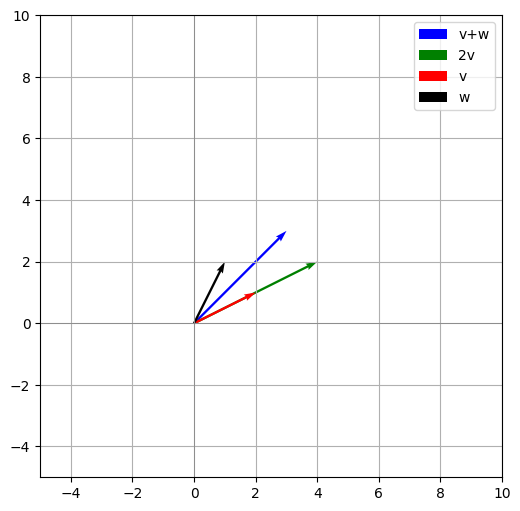

In [3]:
# Define two 2D vectors
v = np.array([2, 1])
w = np.array([1, 2])

# Vector addition and scalar multiplication
v_plus_w = v + w        # [3, 3]
two_v = 2 * v           # [4, 2]
three_w = 3 * w         # [3, 6]
scalar_mult = 2 * v     # same as two_v (kept for clarity)

# Plot the vectors
fig, ax = plt.subplots(figsize=(6, 6))
plot_vectors(ax, [v_plus_w, two_v, v, w], ['b', 'g', 'r', 'k'], ['v+w', '2v', 'v', 'w'])
plt.show()

## 🔹 Data Normalization
- **Goal:** Transform features to have **zero mean** and **unit variance**.
- Useful when features have different scales.

**We’ll** generate synthetic data and normalize it.

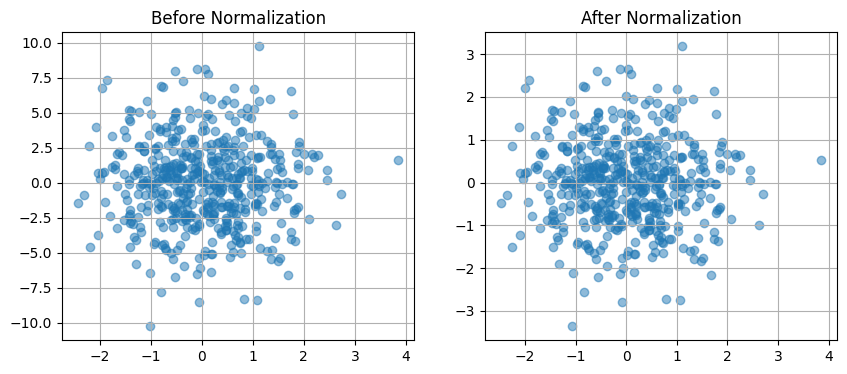

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D Gaussian data with different variances
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0], [0, 10]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, 500)

# Normalize: zero mean, unit variance
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)

# Plot before vs after
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False)
axes[0].scatter(data[:,0], data[:,1], alpha=0.5)
axes[0].set_title('Before Normalization')
axes[0].grid(True)

axes[1].scatter(data_norm[:,0], data_norm[:,1], alpha=0.5)
axes[1].set_title('After Normalization')
axes[1].grid(True)

plt.show()

## 🔹 Constructing a Subspace (Span of Vectors)
- A **subspace** is any set closed under addition and scalar multiplication.
- Here we construct a plane in $(\mathbb{R}^3)$ from two basis vectors.

**Quick definition:** A **vector space** is a set of vectors with addition and scalar multiplication that satisfy the standard axioms (associativity, commutativity, identity, inverses, distributivity, etc.).

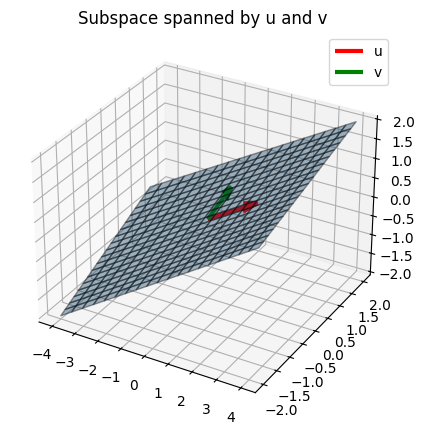

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# Two spanning vectors in R^3
u = np.array([1, 1, 0])
v = np.array([1, 0, 1])

# Create a grid of combinations s*u + t*v
s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)
X = S*u[0] + T*v[0]
Y = S*u[1] + T*v[1]
Z = S*u[2] + T*v[2]

# Plot the subspace (a plane spanned by u and v)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4, edgecolor='k')
ax.quiver(0,0,0, u[0],u[1],u[2], color='r', linewidth=3, label='u')
ax.quiver(0,0,0, v[0],v[1],v[2], color='g', linewidth=3, label='v')
ax.set_title('Subspace spanned by u and v')
ax.legend()
plt.show()

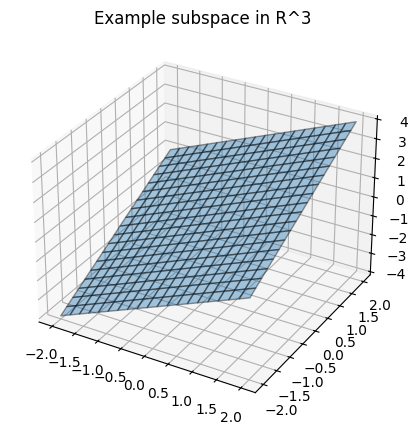

In [6]:
# find the subspace formed by the matrix A within R^3.
A = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 1]])

# Create a meshgrid for s and t to form combinations
s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)
U = np.array([1, 0, 1])  # example spanning vector
V = np.array([0, 1, 1])  # example spanning vector

X = S*U[0] + T*V[0]
Y = S*U[1] + T*V[1]
Z = S*U[2] + T*V[2]

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4, edgecolor='k')
ax.set_title('Example subspace in R^3')
plt.show()

## 🔹 Null Space
- For a matrix $(A)$, the **null space** is the set $(\{x : Ax = 0\})$.
- It’s a subspace capturing directions that collapse to zero under $(A)$.

**Key idea:** If $(A)$ is $(m \times n)$, the null space is a subspace of $(\mathbb{R}^n)$.  
Its dimension is the **nullity** and satisfies: `rank(A) + nullity(A) = n`.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.array([[1, -1, 0],
              [0, 1, -1],
              [0, 0, 0]])  # rank-deficient

# Compute a basis for the null space via SVD
U, S, Vt = np.linalg.svd(A)
tol = 1e-10
null_mask = (S <= tol) if S.size else np.array([True])
null_space = Vt.T[:, -1:] if S.size else Vt.T  # last right-singular vector(s)

null_space

array([[0.57735027],
       [0.57735027],
       [0.57735027]])

## 🔹 Vector Similarity (Word Embeddings)
- **Cosine similarity** measures angle between vectors.
- We’ll fetch a pretrained embedding model and visualize similar words with t-SNE.

In [8]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from numpy.linalg import norm

# Helper: cosine similarity
def cosine_sim(a, b):
    return a @ b / (norm(a) * norm(b) + 1e-12)

[==================================================] 100.0% 66.0/66.0MB downloaded


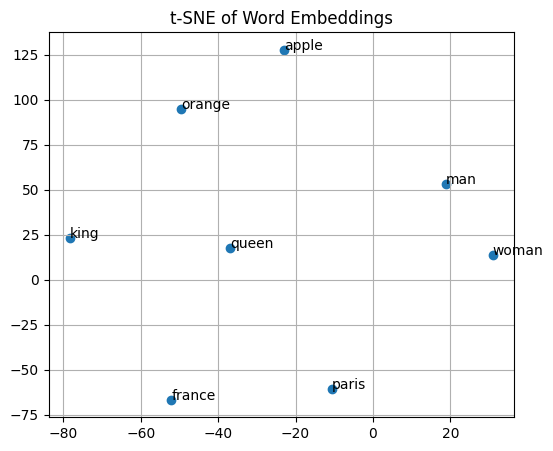

In [9]:
# Load a pretrained word vectors model.
# (Depending on environment, you may need internet; otherwise skip these cells.)
# Try 'glove-wiki-gigaword-50' or a small local model if available.
try:
    model = api.load('glove-wiki-gigaword-50')
    words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'paris', 'france']
    vecs = np.array([model[w] for w in words])

    # Pairwise cosine similarity
    sim = np.zeros((len(words), len(words)))
    for i in range(len(words)):
        for j in range(len(words)):
            sim[i, j] = cosine_sim(vecs[i], vecs[j])

    # 2D projection for visualization
    tsne = TSNE(n_components=2, random_state=42, perplexity=5, init='pca')
    Z = tsne.fit_transform(vecs)

    plt.figure(figsize=(6, 5))
    plt.scatter(Z[:, 0], Z[:, 1])
    for i, w in enumerate(words):
        plt.annotate(w, (Z[i, 0], Z[i, 1]))
    plt.title('t-SNE of Word Embeddings')
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Embedding model not available in this environment. Skipping demo.", e)

## 🔹 Linear Transformations: Scale & Rotate
- Rotation:  
  $$
  R(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}
  $$
- Scaling: multiply by a scalar $(s)$ (or use diagonal matrix).

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define a square (4 points)
square_vectors = np.array([[1, 1],
                           [1, -1],
                           [-1, -1],
                           [-1, 1],
                           [1, 1]])  # closed loop

theta = np.deg2rad(45)  # 45-degree rotation
scaling_factor = 1.2

rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta),  np.cos(theta)]])
scaling_matrix = np.array([[scaling_factor, 0],
                           [0, scaling_factor]])

rotated = square_vectors @ rotation_matrix.T
scaled = rotated @ scaling_matrix.T

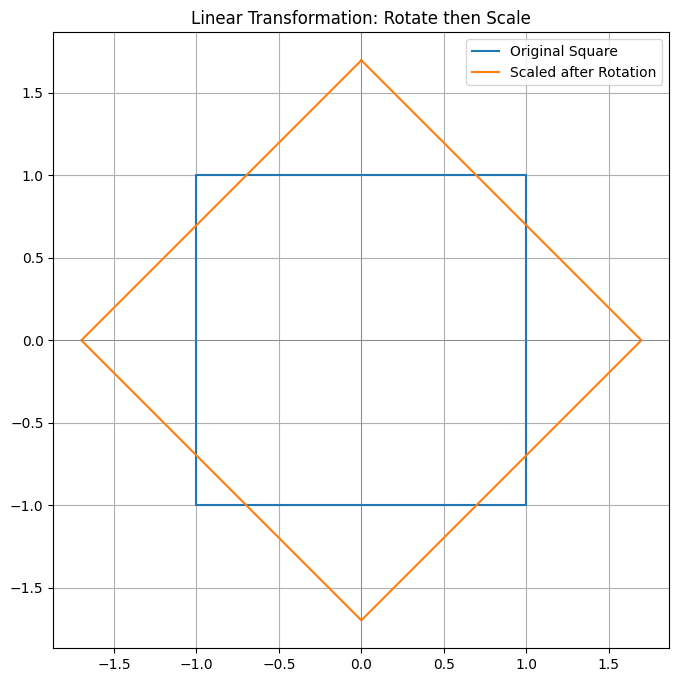

In [11]:
# Visualization
plt.figure(figsize=(8, 8))

# Plot original square
plt.plot(square_vectors[:, 0], square_vectors[:, 1], label='Original Square')

# Plot transformed square
plt.plot(scaled[:, 0], scaled[:, 1], label='Scaled after Rotation')

# Axes and aesthetics
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Linear Transformation: Rotate then Scale')
plt.legend()
plt.grid(True)
plt.show()

## 🔹 PCA Intuition (Low-Rank Structure)
- Create 3D data with a **low-rank** linear transform.
- PCA should recover the **dominant directions** (principal components).

In [12]:
# Set seed for reproducibility
np.random.seed(42)

# Generate random 3D data (100 points)
X = np.random.randn(100, 3)

# Define a low rank 3x3 transformation matrix A (rank ~ 2)
A = np.array([[2, 0, 0],
              [0, 1, 0],
              [1, 0, 0.1]])

Y = X @ A.T  # transformed data
Y_centered = Y - Y.mean(axis=0)

# PCA via SVD
U, S, Vt = np.linalg.svd(Y_centered, full_matrices=False)
principal_components = Vt[:2]  # top 2 components
explained = (S**2) / np.sum(S**2)
explained[:3]

array([0.77821621, 0.21956451, 0.00221927])

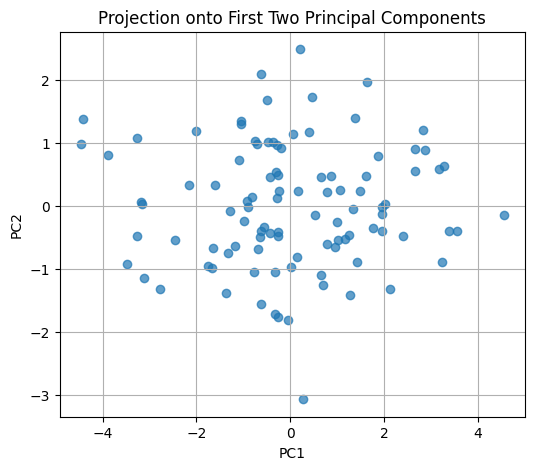

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize projection onto first two PCs
Z2 = Y_centered @ principal_components.T

plt.figure(figsize=(6, 5))
plt.scatter(Z2[:, 0], Z2[:, 1], alpha=0.7)
plt.title('Projection onto First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## 🔹 Solving Linear Systems
We’ll solve $(A\mathbf{x} = \mathbf{b})$ using `np.linalg.solve` (when $(A)$ is square & nonsingular).

In [14]:
# Example 1: Solving a 2x2 system of equations with a unique solution.
A = np.array([[3, 2],
              [1, 2]])
b = np.array([5, 5])

x = np.linalg.solve(A, b)
x

array([0. , 2.5])

In [15]:
# Example 2: Solving a 3x3 system of equations.
A = np.array([[1,  1, 1],
              [2, -1, 3],
              [1, -1, 1]])
b = np.array([6, 14, 2])

x = np.linalg.solve(A, b)
x

array([-4.,  2.,  8.])

## 🔹 Variance Explained (Iris) — PCA 1D
- Project Iris features onto **PC1** and see class separability.
- Then show cumulative variance explained.

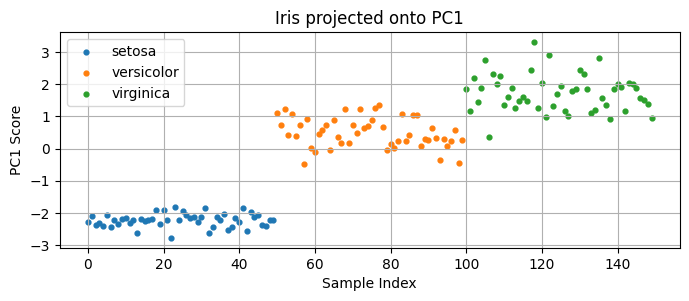

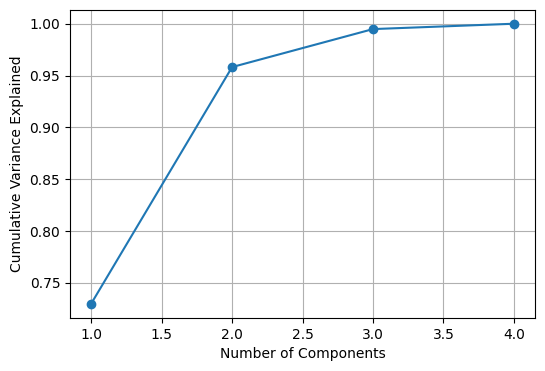

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Standardize
X_std = StandardScaler().fit_transform(X)

# PCA via SVD
Xc = X_std - X_std.mean(axis=0)
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
Z = Xc @ Vt.T  # scores

# 1D projection (PC1)
plt.figure(figsize=(8, 2.8))
for cls in np.unique(y):
    plt.scatter(np.where(y==cls)[0], Z[y==cls, 0], label=target_names[cls], s=12)
plt.title('Iris projected onto PC1')
plt.xlabel('Sample Index')
plt.ylabel('PC1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance explained
cumvar = np.cumsum((S**2)/np.sum(S**2))
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumvar)+1), cumvar, marker='o')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.grid(True)
plt.show()

## 🔹 Logistic Regression Decision Boundary (Iris: 2 classes)
We’ll quickly fit a binary logistic regression on two Iris classes in 2D (after PCA).

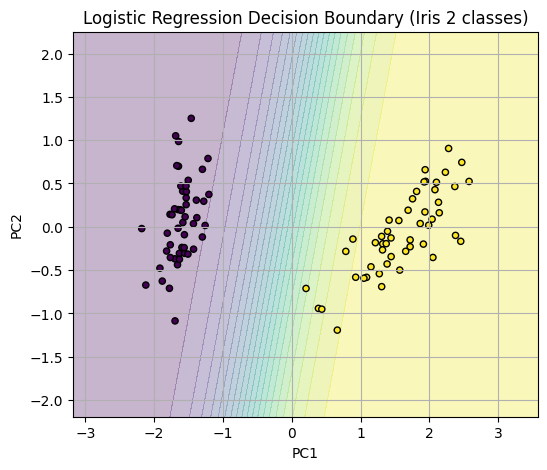

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Load and reduce
iris = load_iris()
X = iris.data
y = iris.target

# Two classes (setosa vs versicolor for example)
mask = y < 2
X = X[mask]
y = y[mask]

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# Fit logistic regression
clf = LogisticRegression().fit(X2, y)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 200),
                     np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
proba = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, proba, levels=20, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary (Iris 2 classes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## 🔹 PCA 2D Scatter (All 3 Classes)
Visualize all Iris classes on the first two PCs.

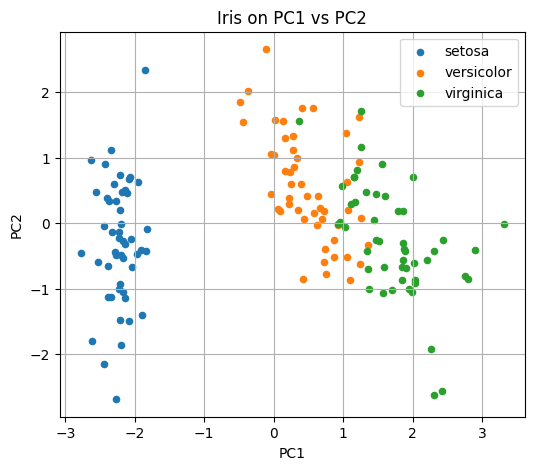

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize
X_std = StandardScaler().fit_transform(X)
Xc = X_std - X_std.mean(axis=0)

# PCA via SVD
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
Z = Xc @ Vt.T  # scores

plt.figure(figsize=(6, 5))
for cls in np.unique(y):
    plt.scatter(Z[y==cls, 0], Z[y==cls, 1], label=target_names[cls], s=20)
plt.title('Iris on PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

## 🔹 Image Compression with SVD
- Decompose image $( I \approx U_k \Sigma_k V_k^\top )$
- Increasing $(k)$ improves quality but costs storage.

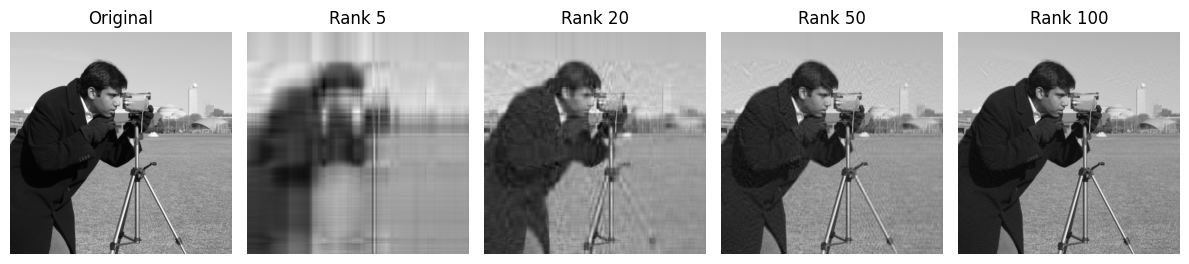

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# Load a sample grayscale image
original_image = img_as_float(data.camera())

# Compute SVD
U, S, Vt = np.linalg.svd(original_image, full_matrices=False)

def reconstruct(k):
    return (U[:, :k] * S[:k]) @ Vt[:k, :]

# Show a few ranks
ks = [5, 20, 50, 100]
fig, axes = plt.subplots(1, len(ks)+1, figsize=(12, 4))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
for i, k in enumerate(ks):
    axes[i+1].imshow(reconstruct(k), cmap='gray')
    axes[i+1].set_title(f'Rank {k}')
    axes[i+1].axis('off')
plt.tight_layout()
plt.show()

## ✅ Wrap-Up
- You practiced vector math, subspaces, and null spaces.
- You saw geometric intuition for **linear transforms**.
- You used **PCA**/**SVD** for dimensionality reduction and compression.
- You solved linear systems and visualized decision boundaries.

### 📝 Exercise
- Replace the random 3D generator with **your own data** and run PCA.
- Try different rotation angles and **scaling factors**.
- Experiment with **SVD ranks** \(k\) and measure reconstruction error.